<a href="https://colab.research.google.com/github/galloBits/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/William_Gallosa_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
content

In [4]:
#pulling the data from the web
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [6]:
# creating a new column as categorical value
df['cabin_class']=df['Pclass'].map({1:'first', 2: 'second', 3: 'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third,third
1,1,1,female,38.0,71.2833,Cherbourg,first,first
2,1,3,female,26.0,7.9250,Southampton,third,third
3,1,1,female,35.0,53.1000,Southampton,first,first
4,0,3,male,35.0,8.0500,Southampton,third,third


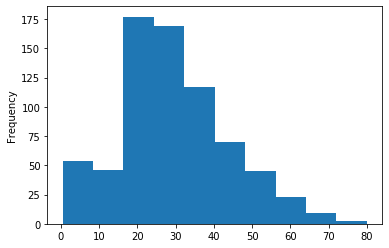

In [9]:
# display a histogram on a column
df['Age'].plot(kind='hist');

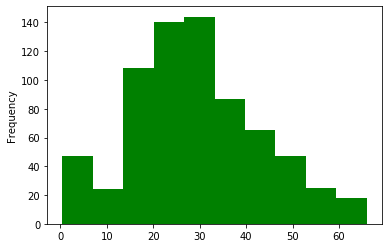

In [11]:
#remove the outliers in this column

df=df[df['Age']<70]
df['Age'].plot(kind='hist',color='green');


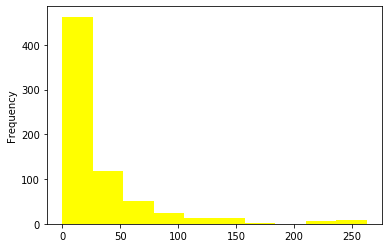

In [14]:
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist',color='yellow');

In [12]:
# A continuous var can be converted to categorical var using bining.
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high', 'vhigh']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults= df['fare_groups'].value_counts().sort_index()
myresults

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


low       152
medium    188
high      184
vhigh     171
Name: fare_groups, dtype: int64

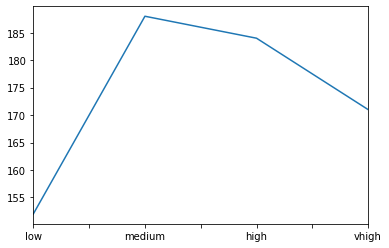

In [13]:
myresults.plot()

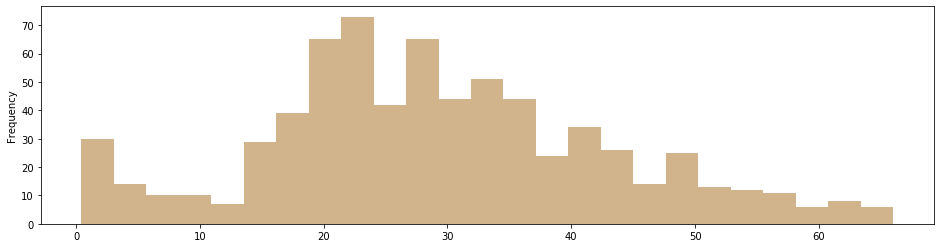

In [15]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

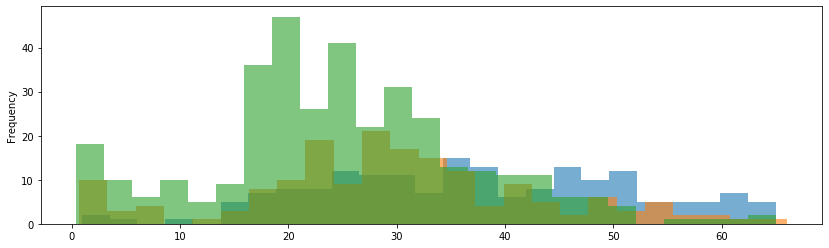

In [21]:
#Stacked histograms
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.6);
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.6);
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.6);

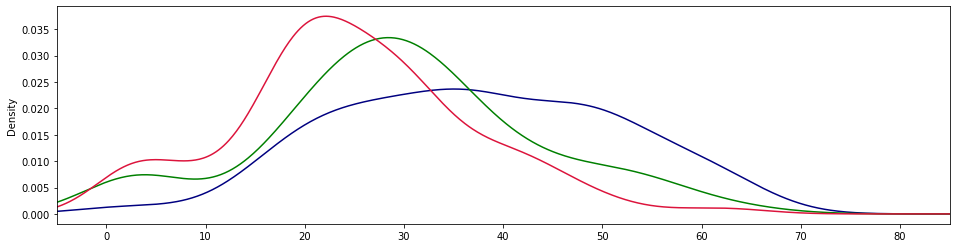

In [25]:
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5,85), figsize=(16,4), color='navy')
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5,85), figsize=(16,4), color='green')
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='crimson');

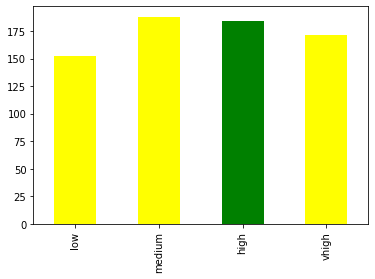

In [26]:
df['fare_groups'].value_counts().sort_index().plot(kind='bar', color=['yellow', 'yellow', 'green','yellow']);

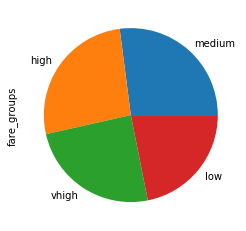

In [27]:
# pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [28]:
# crosstab function with two cat variable
cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,61,116
second,89,83
third,268,85


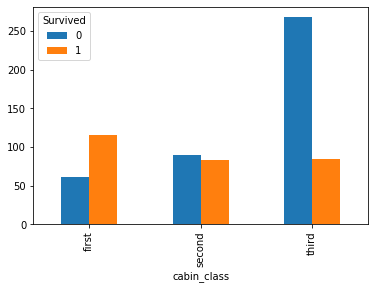

In [29]:
#same set into barchart
cab_death.plot(kind='bar');

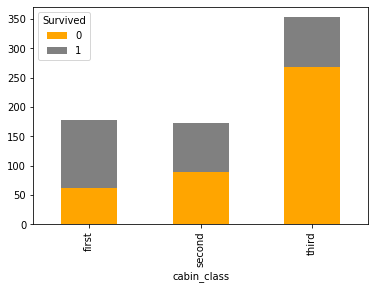

In [30]:
#stacked bar chart
cab_death.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [31]:
cab_death = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
cab_death

Survived,0,1
cabin_class,,
first,0.344633,0.655367
second,0.517442,0.482558
third,0.759207,0.240793


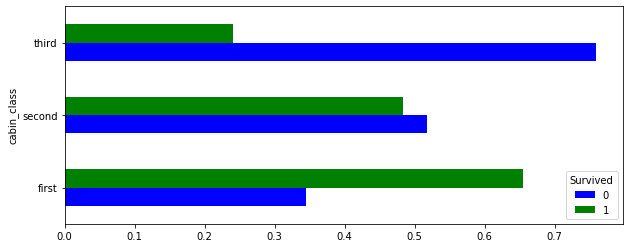

In [32]:
cab_death.plot(kind='barh', color=['blue', 'green'], figsize=(10,4));

In [33]:
#take the average of continuous variable
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     37.363955
second    29.644360
third     24.873711
Name: Age, dtype: float64

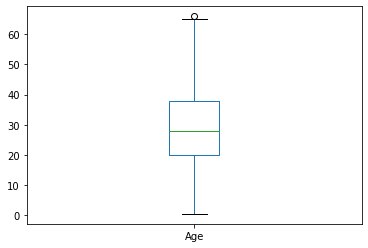

In [34]:
# A single Variable in a plot box
df['Age'].plot(kind='box');

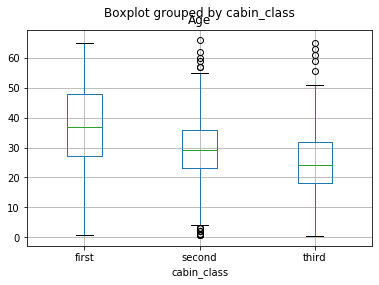

In [35]:
df.boxplot(column='Age', by='cabin_class');

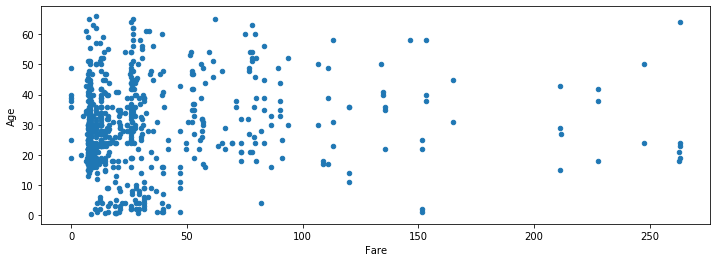

In [36]:
# scatter plot
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12,4));

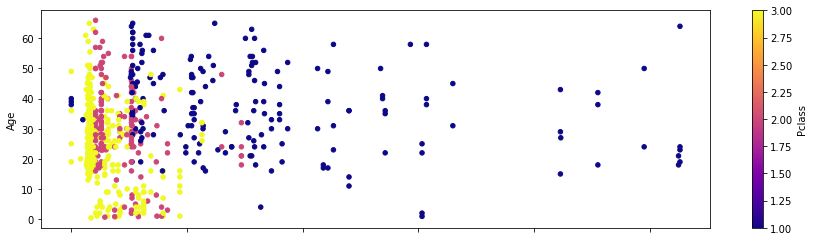

In [38]:
#using 3 variable either continuos or categorical
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

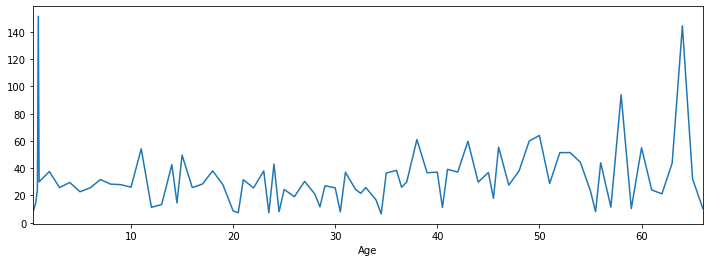

In [40]:
# Line chart
df.groupby('Age') ['Fare'].mean().plot(figsize=(12,4));

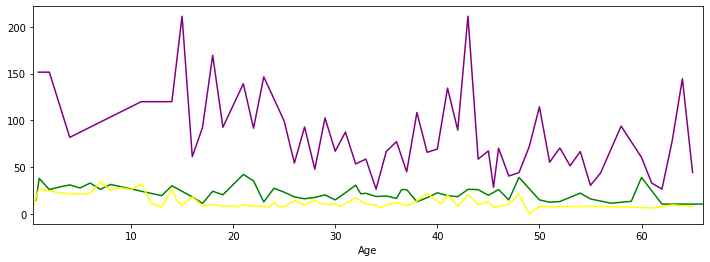

In [42]:
#Same line chart by loop for each values
mycolors=['purple', 'green','yellow']

for x in[1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

In [44]:
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.356549,-0.074335,0.273531
Pclass,-0.356549,1.000000,-0.365121,-0.617591
Age,-0.074335,-0.365121,1.000000,0.103100
Fare,0.273531,-0.617591,0.103100,1.000000


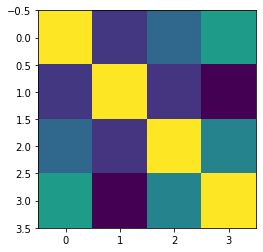

In [45]:
plt.imshow(corr_matrix);

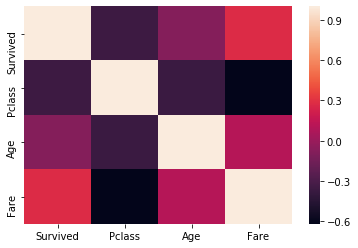

In [46]:
# Same plot but in seaborn instead
sns.heatmap(corr_matrix);

In [47]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x** 2

x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [48]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

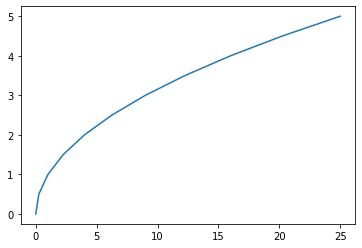

In [50]:
#basic matplotlit commands
plt.plot(y,x);

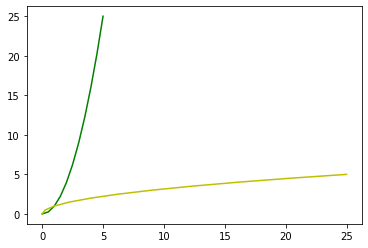

In [51]:
plt.plot(x,y, 'g')
plt.plot(y,x, 'y')

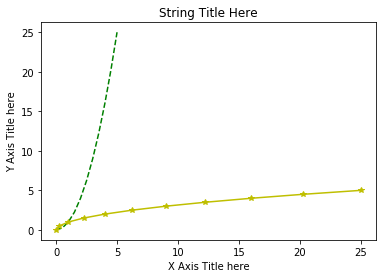

In [53]:
# Adding labels to chart
plt.plot(x,y, 'g--')
plt.plot(y,x, 'y*-')
plt.xlabel('X Axis Title here')
plt.ylabel('Y Axis Title here')
plt.title('String Title Here');

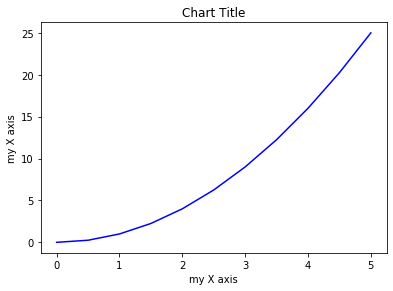

In [57]:
# Creating an empty canvas with fig()
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Plot on that set of axes
# Notice the use of set_ to begin methods
axes.plot(x, y, 'b')
axes.set_xlabel('my X axis')
axes.set_ylabel('my X axis')
axes.set_title('Chart Title');

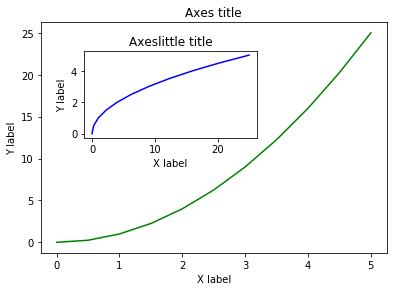

In [67]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8,0.8,])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

# Larger Figure Axes 1
axes1.plot(x, y, 'g')
axes1.set_xlabel('X label')
axes1.set_ylabel('Y label')
axes1.set_title('Axes title')

# Insert Figurpe Axes 2
axes2.plot(y,x, 'b')
axes2.set_xlabel('X label')
axes2.set_ylabel('Y label')
axes2.set_title('Axeslittle title');

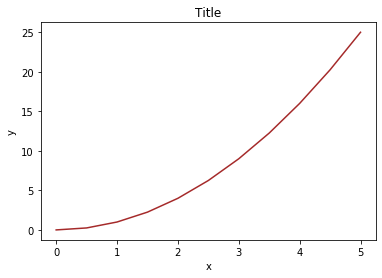

In [77]:
#Using the plt.plots() function
fig, axes = plt.subplots(nrows=1, ncols=1)

axes.plot(x,y, 'brown')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Title');

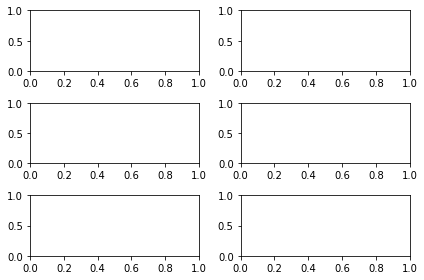

In [81]:
fig, axes = plt.subplots(nrows=3, ncols=2)

fig
plt.tight_layout()


In [82]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f114d672160>,
      dtype=object)

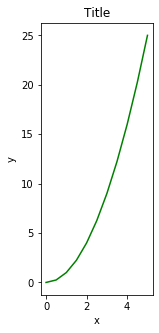

<Figure size 800x400 with 0 Axes>

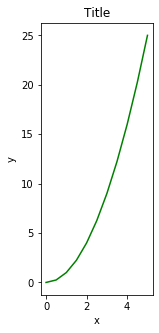

In [83]:
# Figure size and DPI (dot per inch)
fig = plt.figure(figsize=(8,4), dpi=100)
fig, axes = plt.subplots(figsize=(2,5))

axes.plot(x,y, 'g')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Title');


fig  

In [0]:
# Saving the fig
fig.savefig("namefig.png", dpi=120)

# New Section

# New Section

# New Section

# New Section

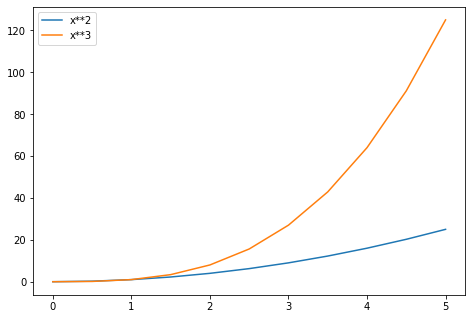

In [87]:
#Creating Legends
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend();

In [0]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv'



In [93]:
df = pd.read_csv(url)
df.head()


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# convert timestamp string to objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
#Making timestamp into an Index
df.set_index('timestamp', inplace=True)

In [96]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [100]:
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

['tableau-colorblind10', 'seaborn-muted', 'seaborn', 'dark_background', 'grayscale']


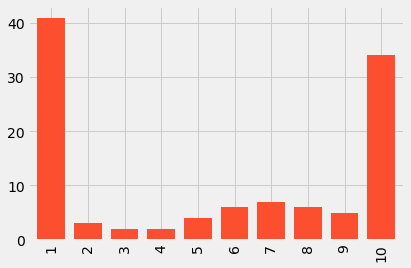

In [101]:
fake = pd.Series([41, 3, 2, 2, 4, 6, 7, 6, 5,34], index=range(1,11))
fake.plot.bar(color='C1', width=0.75);

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here